# Load Bit File
This will reload the bitstream, insert the kernel module for ad9361

In [4]:
from pynq import Overlay
ol = Overlay("./base.bit")
ol.download(dtbo="./pl.dtbo")

# capture data using libiio

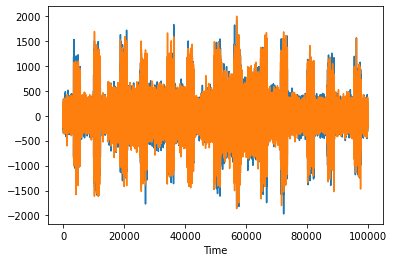

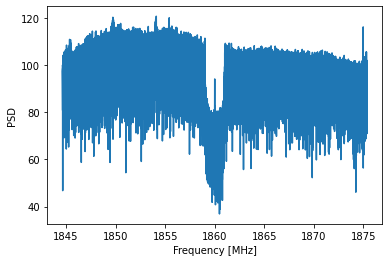

In [6]:
import numpy as np
import adi
import matplotlib.pyplot as plt

sample_rate = 30.72e6 # Hz
center_freq = 1860e6 # Hz
num_samps = 100000 # number of samples per call to rx()


sdr = adi.ad9361(uri="local:")
sdr.sample_rate = int(sample_rate)

# Config Rx
sdr.rx_lo = int(center_freq)
sdr.rx_rf_bandwidth = int(sample_rate)
sdr.rx_buffer_size = num_samps
sdr.gain_control_mode_chan0 = 'slow_attack'
sdr.rx_enabled_channels = [0]
# sdr.rx_hardwaregain_chan0 = -10.0 # dB, increase to increase the receive gain, but be careful not to saturate the ADC

# Clear buffer just to be safe
for i in range (0, 10):
    raw_data = sdr.rx()

# Receive samples
rx_samples = sdr.rx()


# Calculate power spectral density (frequency domain version of signal)
psd = np.abs(np.fft.fftshift(np.fft.fft(rx_samples)))**2
psd_dB = 10*np.log10(psd)
f = np.linspace(sample_rate/-2, sample_rate/2, len(psd)) + center_freq

# Plot time domain
plt.figure(0)
plt.plot(np.real(rx_samples))
plt.plot(np.imag(rx_samples))
plt.xlabel("Time")

# Plot freq domain
plt.figure(1)
plt.plot(f/1e6, psd_dB)
plt.xlabel("Frequency [MHz]")
plt.ylabel("PSD")
plt.show()